# Lecture 8: Interpolation

Date: 09/26/2017, Tuessday

In [1]:
format compact

## A simple example

Make 3 data points

In [2]:
xp = [-pi/2, 0, pi/2];
yp = [-1, 0, 1];

The two functions below both go through the 3 data points.

In [3]:
f = @(x) sin(x);
g = @(x) 2*x/pi;

There are ways to plot a function symbolically/analytically 
([for example](https://www.mathworks.com/help/symbolic/ezplot.html)),
but those methods have a lot of limitations and you don't have detailed controls on them.

So we stick to the most standard way of plotting: evaluate the function value on a lot of points to make the line look smooth. 

In [4]:
x = linspace(-2,2,1e3); % a 1000 grid points from -2 to 2

Always remember to surpress the output (by `;`) when defining this kind of large array. MATLAB WILL print all the elements in an array/matrix no matter how large it is. Sometimes your program will die just because it wants to print $10^{10}$ numbers.

Now we can plot the functions and data points.

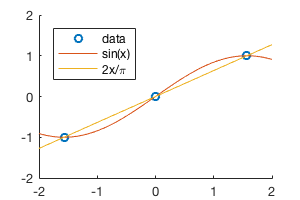

In [5]:
%plot --size 300,200
hold on
plot(xp,yp,'o')
plot(x,f(x))
plot(x,g(x))
legend('data','sin(x)','2x/\pi','Location','northwest')

## Polynomial interpolation

In [6]:
% make some data points
n = 5;
px = [0 1 2 3 4];
py = [1 2 2 6 9];

n data point can be precisely fitted by a n-1 degree polynomial $p=c_1+c_2x+...+c_nx^{n-1}$.

The coffeicients $c=[c_1,c_2,...c_n]^T$ satisfy the equation
$$
Vc=y
$$

where $y=[y_1,y_2,...,y_n]^T$ is the data points you want to fit, and V is the [vandermode matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) only containing powers of $x_k$, the data points.

In [7]:
% calculate the vander matrix by loop
V = zeros(n);
for j=1:5
    V(:,j) = px.^(j-1);
end
V

V =
     1     0     0     0     0
     1     1     1     1     1
     1     2     4     8    16
     1     3     9    27    81
     1     4    16    64   256


The built-in `vander` is flipped left-right. Both forms are correct as long as your algorithm is consistent with the matrix.


In [8]:
vander(px)

ans =
     0     0     0     0     1
     1     1     1     1     1
    16     8     4     2     1
    81    27     9     3     1
   256    64    16     4     1


Now we can solve $Vc=y$ by $c=V^{-1}y$. In MATLAB backslash form it is `c=V\y`. Note that the actual code never computes $V^{-1}$, but use something like LU factorization/Gaussian elimination to solve the system. (it is almost always a bad idea to compute the inverse of a matrix). But thinking about $V^{-1}y$ helps you to remember the order of V and y in the command (e.g. is it `V\y` or `y\V` ?).

The code below throws an error because y is a row vector.

In [9]:
c = V\py

Error using \
Matrix dimensions must agree.


You need a column vector on the right side, just like how you write the equation mathematically.

In [10]:
c = V\py'

c =
    1.0000
    5.6667
   -7.5833
    3.3333
   -0.4167


Now we have the coefficients $c$, we can write the polynomial $p=c_1+c_2x+...+c_nx^{n-1}$ as a MATLAB function.

Here's a naive way to evaluate the polynomial. You should write a loop instead.

In [11]:
my_ploy = @(c,x) c(1) + c(2)*x + c(3)*x.^2 + c(4)*x.^3 + c(5)*x.^4 ;

In [12]:
% evaluate the function on a lot of data points
xf = linspace(-1,5,100);
yf = my_ploy(c,xf);

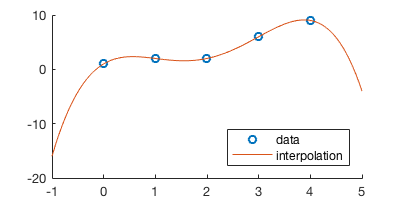

In [13]:
%plot --size 400,200
hold on
plot(px,py,'o')
plot(xf,yf)
legend('data','interpolation','Location','southeast')